In [36]:
import os
os.chdir("/Users/lynnmatar/QMCSoftware/Python_Prototype/")
print("root directory = %s " % os.getcwd())
#! python setup.py install

root directory = /Users/lynnmatar/QMCSoftware/python_prototype 


In [41]:
from qmcpy import *

<h1>IID Scatter Plots</h1>
<p> Visualize IID standard uniform and standard normal sampling points</p>

In [42]:
def iid_scatters():
    """
    Visualize IID standard uniform and standard normal sampling points.

    Returns:
        None

    Note:
        Plot is generated in outputs/scatters/iid_dd.png.
    """
    plt.cla()
    plt.clf()
    discrete_distribs = [IIDStdUniform(rng_seed=7), IIDStdGaussian(rng_seed=7)]
    dd_names = ["$\\mathcal{U}_2\\,(0,1)$", "$\\mathcal{N}_2\\,(0,1)$"]
    colors = ["b", "r"]
    lims = [[0, 1], [-2.5, 2.5]]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
    for i, (dd_obj, color, lim, dd_name) in \
            enumerate(zip(discrete_distribs, colors, lims, dd_names)):
        samples = dd_obj.gen_dd_samples(1, n, 2).squeeze()
        ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
        ax[i].set_xlabel("$x_1$")
        ax[i].set_ylabel("$x_2$")
        ax[i].set_xlim(lim)
        ax[i].set_ylim(lim)
        ax[i].set_aspect("equal")
        ax[i].set_title(dd_name)
    fig.suptitle("IID Discrete Distributions")
    plt.tight_layout()
    plt.show(block=False)
    fig.savefig("outputs/scatters/iid_dd.png", dpi=200)

<Figure size 432x288 with 0 Axes>

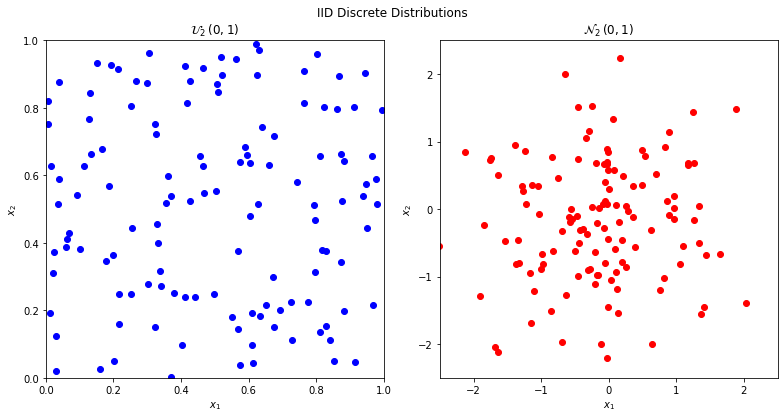

In [43]:
iid_scatters()

<h1>Lattice Scatters</h1>
<p>Visualize shifted lattice and scrambled Sobol sampling points<p>

In [44]:
def lds_scatters():
    """
    Visualize shifted lattice and scrambled Sobol sampling points.

    Returns:
        None

    Note:
        Plot is generated in outputs/scatters/lds_dd.png.
    """
    plt.cla()
    plt.clf()
    discrete_distribs = [Lattice(rng_seed=7), Sobol(rng_seed=7)]
    dd_names = ["Shifted Lattice", "Scrambled Sobol"]
    colors = ["g", "c"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
    for i, (dd_obj, color, dd_name) in \
            enumerate(zip(discrete_distribs, colors, dd_names)):
        samples = dd_obj.gen_dd_samples(1, n, 2).squeeze()
        ax[i].scatter(samples[:, 0], samples[:, 1], color=color)
        ax[i].set_xlabel("$x_1$")
        ax[i].set_ylabel("$x_2$")
        ax[i].set_xlim([0, 1])
        ax[i].set_ylim([0, 1])
        ax[i].set_aspect("equal")
        ax[i].set_title(dd_name)
    fig.suptitle("Low Discrepancy Discrete Distributions")
    plt.tight_layout()
    plt.show(block=False)
    fig.savefig("outputs/scatters/lds_dd.png", dpi=200)

<Figure size 432x288 with 0 Axes>

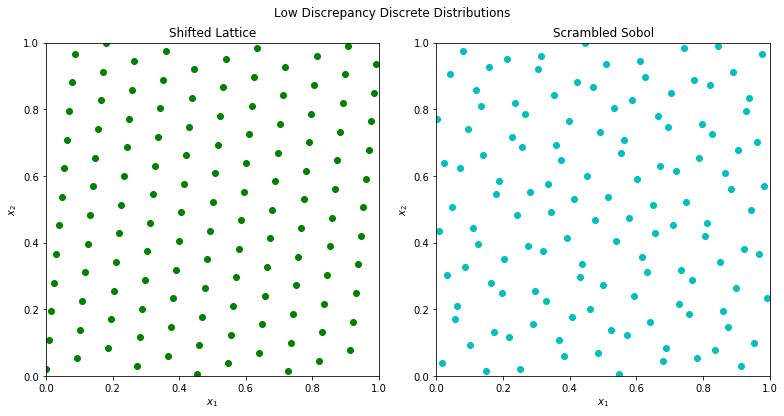

In [45]:
lds_scatters()

<h1>Grid transformations</h1>
<p>Visualize the different grid transformations</p>

In [48]:
def grid_transform_scatters():
    plt.cla()
    plt.clf()
    time_vector = [arange(1 / 2, 3 / 2, 1 / 2)]
    true_measures = [Uniform(2), Gaussian(2),
                     BrownianMotion(dimension=2, time_vector=time_vector)]
    tm_names = ["$\\mathcal{U}_2\\,(0,1)$", "$\\mathcal{N}_2\\,(0,1)$",
                "BrownianMotion with time_vector = [.5 , 1]"]
    discrete_distribs = [IIDStdUniform(rng_seed=7), IIDStdGaussian(rng_seed=7),
                         Lattice(rng_seed=7), Sobol(rng_seed=7)]
    dd_names = ["IID $\\mathcal{U}_2\\,(0,1)$", "IID $\\mathcal{N}_2\\,(0,1)$",
                "Shifted Lattice", "Scrambled Sobol"]
    colors = ["r", "g", "b"]
    lims = [[0, 1], [-2.5, 2.5], [-2.5, 2.5]]
    for true_measure, lim, color, tm_name \
            in zip(true_measures, lims, colors, tm_names):
        fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 11))
        for k, (discrete_distrib, dd_name) in \
                enumerate(zip(discrete_distribs, dd_names)):
            i, j = k // 2, k % 2
            tm_obj = deepcopy(true_measure)
            dd_obj = deepcopy(discrete_distrib)
            tm_obj.set_tm_gen(dd_obj)
            tm_samples = tm_obj[0].gen_tm_samples(1, n).squeeze()
            ax[i, j].scatter(tm_samples[:, 0], tm_samples[:, 1], color=color)
            ax[i, j].set_xlabel("$x_1$")
            ax[i, j].set_ylabel("$x_2$")
            ax[i, j].set_xlim(lim)
            ax[i, j].set_ylim(lim)
            ax[i, j].set_aspect("equal")
            ax[i, j].set_title(dd_name)
        fig.suptitle("True Measure: %s" % tm_name)
        plt.tight_layout()
        prefix = type(true_measure).__name__
        fig.savefig("outputs/scatters/%s_tm_transform.png" % prefix, dpi=200)
        plt.show(block=False)

<Figure size 432x288 with 0 Axes>

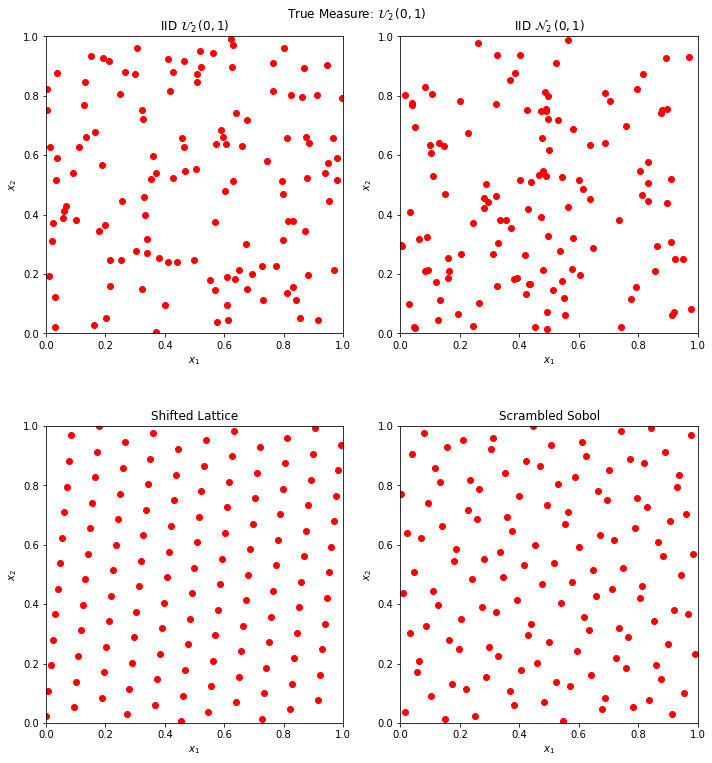

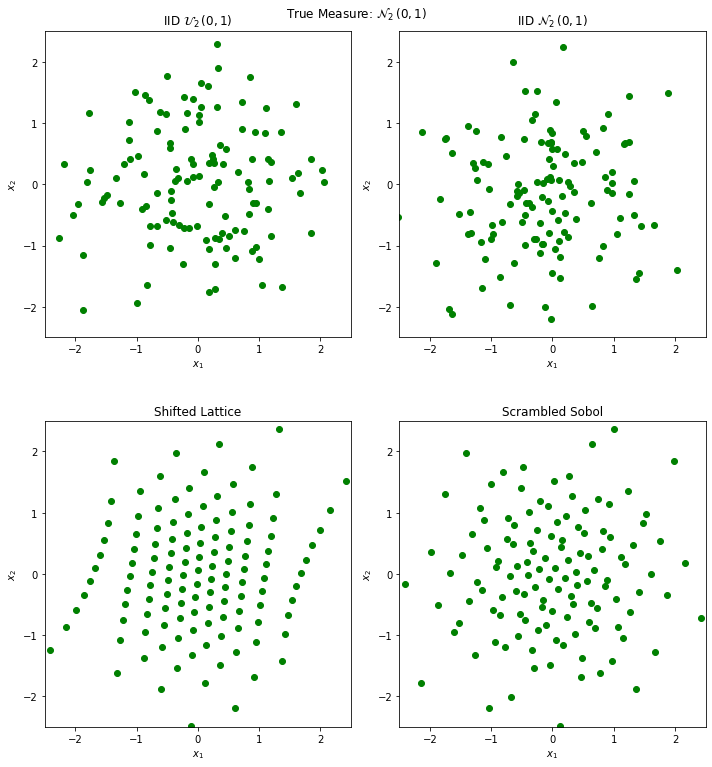

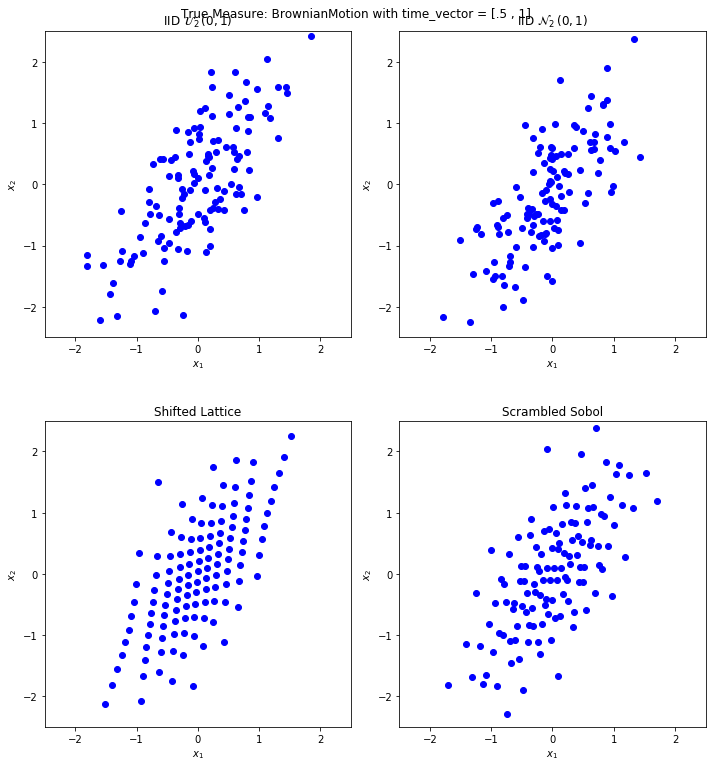

In [49]:
grid_transform_scatters()

<h1>Sobol Scatters</h1>
<p> Visualize shifted and stretched Sobol sampling points</p>

In [52]:
def shift_stretch_sobol_scatters():
    plt.cla()
    plt.clf()
    u1_a, u1_b = 2, 4
    u2_a, u2_b = 6, 8
    g1_mu, g1_var = 3, 9
    g2_mu, g2_var = 7, 9
    discrete_distrib = Sobol(rng_seed=7)
    u_obj = Uniform(dimension=array([2]),
                    lower_bound=[array([u1_a, u2_a])],
                    upper_bound=[array([u1_b, u2_b])])
    n_obj = Gaussian(dimension=array([2]),
                     mean=[array([g1_mu, g2_mu])],
                     variance=[array([g1_var, g2_var])])
    colors = ["m", "y"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))
    for i, (true_measure, color) in enumerate(zip([u_obj, n_obj], colors)):
        tm_obj = deepcopy(true_measure)
        dd_obj = deepcopy(discrete_distrib)
        tm_obj.set_tm_gen(dd_obj)
        tm_samples = tm_obj[0].gen_tm_samples(1, n).squeeze()
        ax[i].scatter(tm_samples[:, 0], tm_samples[:, 1], color=color)
        ax[i].set_xlabel("$x_1$")
        ax[i].set_ylabel("$x_2$")
        ax[i].set_aspect("equal")
    ax[0].set_title("$X_1$ ~ $\\mathcal{U}\\,(%d,%d)$\t,\t" % (u1_a, u1_b) +
                    "$X_2$ ~ $\\mathcal{U}\\,(%d,%d)$" % (u2_a, u2_b))
    ax[1].set_title("$X_1$ ~ $\\mathcal{N}\\,(%d,%d)$\t,\t" % (g1_mu, g1_var) +
                    "$X_2$ ~ $\\mathcal{N}\\,(%d,%d)$" % (g2_mu, g2_var))
    ax[0].set_xlim([u1_a, u1_b])
    ax[0].set_ylim([u2_a, u2_b])
    spread_g1 = ceil(3 * g1_var**.5)
    spread_g2 = ceil(3 * g2_var**.5)
    ax[1].set_xlim([g1_mu - spread_g1, g1_mu + spread_g1])
    ax[1].set_ylim([g2_mu - spread_g2, g2_mu + spread_g2])
    fig.suptitle("Shift and Stretch Sobol Distribution")
    plt.tight_layout()
    plt.show(block=False)
    fig.savefig("outputs/scatters/shift_stretch_tm.png", dpi=200)

<Figure size 432x288 with 0 Axes>

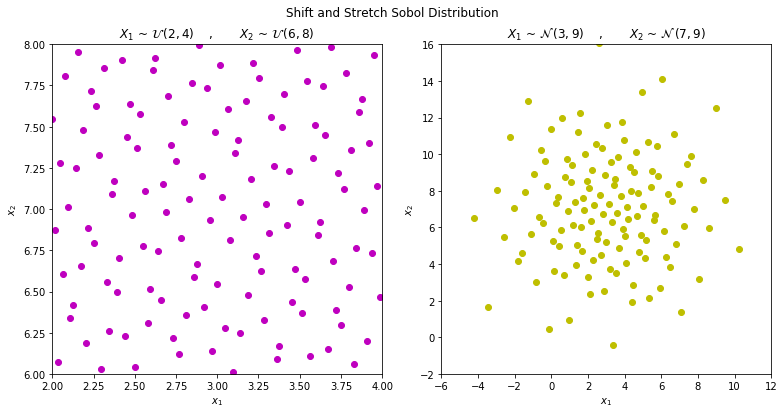

In [51]:
shift_stretch_sobol_scatters()